# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [17]:
data = pd.read_csv('weight-height.csv')

male_df =  data.loc[data.Gender == 'Male']
female_df =  data.loc[data.Gender == 'Female']

print("Male height mean:", male_df.Height.mean())
print("Male height SD:", male_df.Height.std())
print("Male weight mean:", male_df.Weight.mean())
print("Male weight SD:", male_df.Weight.std())  
print("Female height mean:", female_df.Height.mean())
print("Female height SD:", female_df.Height.std())
print("Female weight mean:", female_df.Weight.mean())
print("Female weight SD:", female_df.Weight.std())  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male height mean: 69.02634590621741
Male height SD: 2.863362228660647
Male weight mean: 187.0206206581932
Male weight SD: 19.7811545167638
Female height mean: 63.70877360342507
Female height SD: 2.696284015765054
Female weight mean: 135.86009300746835
Female weight SD: 19.022467805319028


In [29]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


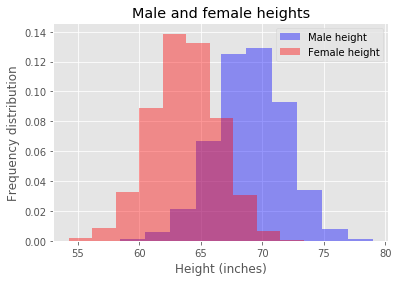

In [71]:
male_df.Height.plot.hist(bins = 10, normed = True,  alpha = 0.4, label ="Male height", color = 'blue')
female_df.Height.plot.hist(bins = 10, normed = True, alpha = 0.4, label = 'Female height', color = 'red')
plt.legend()
plt.title('Male and female heights')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency distribution')
plt.show()

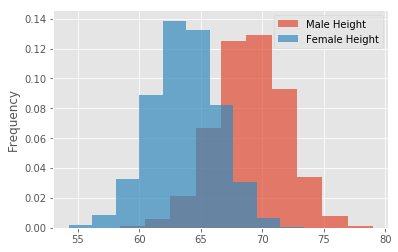

*Record your observations - are these inline with your personal observations?*

Similar distribution shapes but males taller on average than females - yes.


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

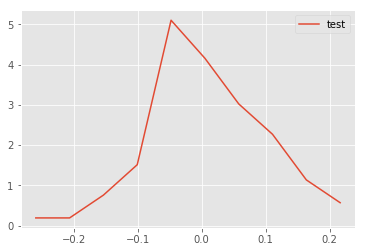

In [56]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    
# Initialize numpy arrays according to number of bins with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

# Interpolate through histogram bins 
# identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    
    # plot the calculated curve
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend();

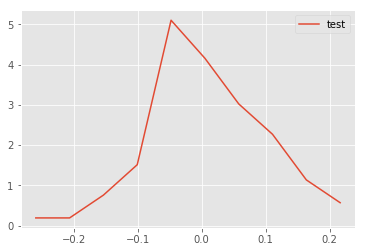

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


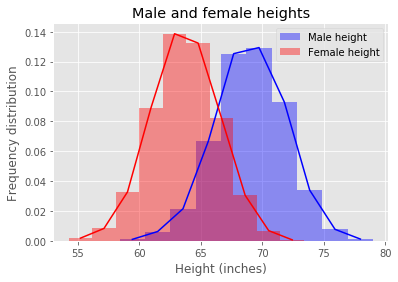

In [72]:
# Your code here 
male_df.Height.plot.hist(bins = 10, normed = True,  alpha = 0.4, label ="Male height", color = 'blue')
female_df.Height.plot.hist(bins = 10, normed = True, alpha = 0.4, label = 'Female height', color = 'red')
x,y = density(male_df.Height)
plt.plot(x,y, color = 'blue')
x,y = density(female_df.Height)
plt.plot(x,y, color = 'red')
plt.legend()
plt.title('Male and female heights')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency distribution')
plt.show()

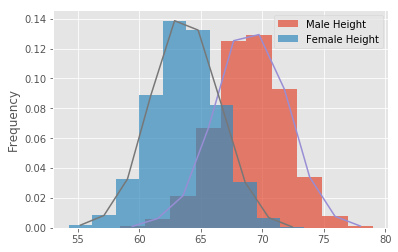

#### Repeat above exerice for male and female weights

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


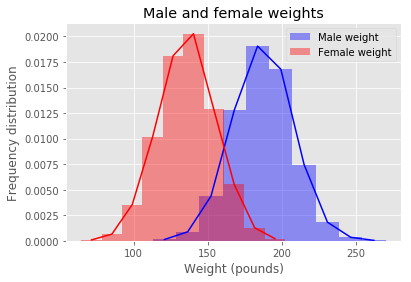

In [74]:
# Your code here 
male_df.Weight.plot.hist(bins = 10, normed = True,  alpha = 0.4, label ="Male weight", color = 'blue')
female_df.Weight.plot.hist(bins = 10, normed = True, alpha = 0.4, label = 'Female weight', color = 'red')
x,y = density(male_df.Weight)
plt.plot(x,y, color = 'blue')
x,y = density(female_df.Weight)
plt.plot(x,y, color = 'red')
plt.legend()
plt.title('Male and female weights')
plt.xlabel('Weight (pounds)')
plt.ylabel('Frequency distribution')
plt.show()

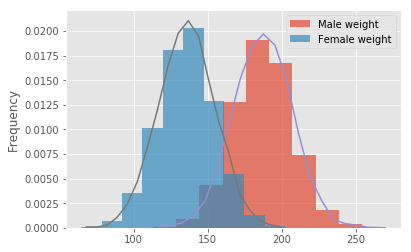

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?
#Same as above

# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


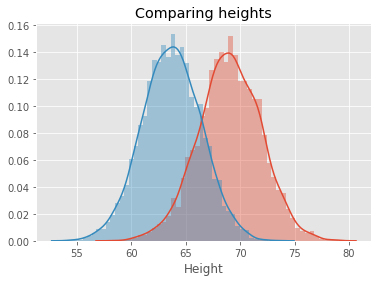

In [76]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing heights')
plt.show()

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


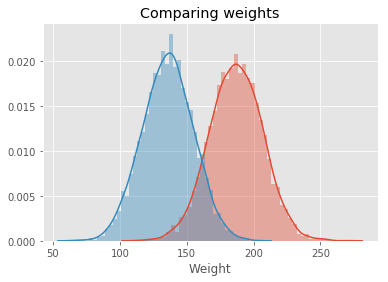

In [77]:
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing weights')
plt.show()

Text(0.5,1,'Comparing weights')

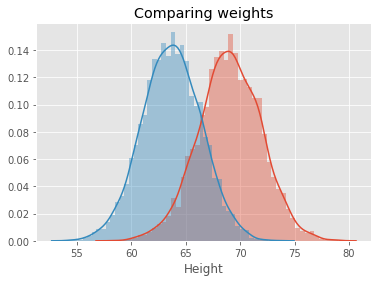

Text(0.5,1,'Comparing Weights')

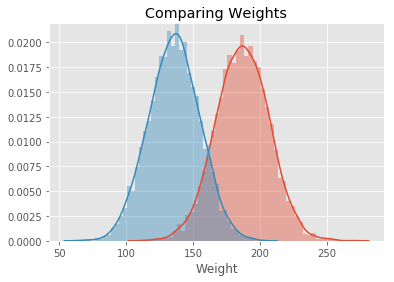

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.